In [1]:
# 기본 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 전처리 및 분할
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# 모델
from sklearn.neighbors import KNeighborsClassifier

# 딥러닝
import tensorflow as tf
from tensorflow import keras

In [2]:
# 파일 경로 설정
file_path = "/content/drive/MyDrive/Colab Notebooks/weather.csv"

# CSV 파일 읽기
df = pd.read_csv(file_path)

# 데이터프레임 확인
print(df.head())

        Date  Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  11/1/2007  Canberra      8.0     24.3       0.0          3.4       6.3   
1  11/2/2007  Canberra     14.0     26.9       3.6          4.4       9.7   
2  11/3/2007  Canberra     13.7     23.4       3.6          5.8       3.3   
3  11/4/2007  Canberra     13.3     15.5      39.8          7.2       9.1   
4  11/5/2007  Canberra      7.6     16.1       2.8          5.6      10.6   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  Pressure9am  \
0          NW           30.0         SW  ...          29       1019.7   
1         ENE           39.0          E  ...          36       1012.4   
2          NW           85.0          N  ...          69       1009.5   
3          NW           54.0        WNW  ...          56       1005.5   
4         SSE           50.0        SSE  ...          49       1018.3   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RISK_MM  \
0       1015.0        

In [3]:
#데이터 확인
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,11/1/2007,Canberra,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,11/2/2007,Canberra,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,11/3/2007,Canberra,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,11/4/2007,Canberra,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,11/5/2007,Canberra,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,10/27/2008,Canberra,9.0,30.7,0.0,7.6,12.1,NNW,76.0,SSE,...,15,1016.1,1010.8,1,3,20.4,30.0,No,0.0,No
362,10/28/2008,Canberra,7.1,28.4,0.0,11.6,12.7,N,48.0,NNW,...,22,1020.0,1016.9,0,1,17.2,28.2,No,0.0,No
363,10/29/2008,Canberra,12.5,19.9,0.0,8.4,5.3,ESE,43.0,ENE,...,47,1024.0,1022.8,3,2,14.5,18.3,No,0.0,No
364,10/30/2008,Canberra,12.5,26.9,0.0,5.0,7.1,NW,46.0,SSW,...,39,1021.0,1016.2,6,7,15.8,25.9,No,0.0,No


In [5]:
# 컬렴명 확인
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

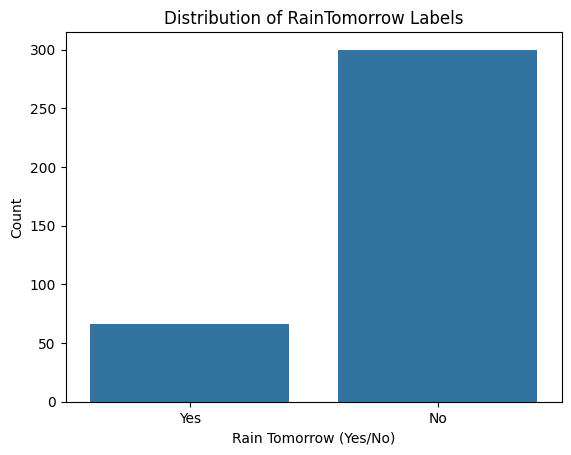

In [6]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data=df, x="RainTomorrow")
plt.xlabel("Rain Tomorrow (Yes/No)")
plt.ylabel("Count")
plt.title("Distribution of RainTomorrow Labels")
plt.show()

In [7]:
# 레이블 갯수 확인 (숫자)
df['RainTomorrow'].value_counts()

,count
RainTomorrow,
No,300
Yes,66


In [8]:
# 결측치 확인
df.isnull().sum()

,0
Date,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,3
WindGustDir,3
WindGustSpeed,2
WindDir9am,31


In [9]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()


,0
Date,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustDir,0
WindGustSpeed,0
WindDir9am,0


In [12]:
X = df.drop(columns=['RainTomorrow', 'RISK_MM', 'Date'])
X.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,Canberra,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,...,20,68,29,1019.7,1015.0,7,7,14.4,23.6,No
1,Canberra,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,...,17,80,36,1012.4,1008.4,5,3,17.5,25.7,Yes
2,Canberra,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,...,6,82,69,1009.5,1007.2,8,7,15.4,20.2,Yes
3,Canberra,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,...,24,62,56,1005.5,1007.0,2,7,13.5,14.1,Yes
4,Canberra,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,...,28,68,49,1018.3,1018.5,7,7,11.1,15.4,Yes


In [21]:
# 범주형 컬럼 확인
categorical_cols = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

# 원-핫 인코딩
X = pd.get_dummies(df.drop(columns=['RainTomorrow', 'RISK_MM', 'Date']), columns=categorical_cols, drop_first=True)

# 결측치 처리 (간단히 0으로 채우기, 필요 시 다른 방법 가능)
X = X.fillna(0)

y=df['RainTomorrow']
y.value_counts()

# 학습/테스트 분리
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [19]:
X.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_Yes
0,8.0,24.3,0.0,3.4,6.3,30.0,6.0,20,68,29,...,True,False,False,False,False,False,False,False,False,False
1,14.0,26.9,3.6,4.4,9.7,39.0,4.0,17,80,36,...,False,False,False,False,False,False,True,False,False,True
2,13.7,23.4,3.6,5.8,3.3,85.0,6.0,6,82,69,...,False,False,False,False,False,False,False,False,False,True
3,13.3,15.5,39.8,7.2,9.1,54.0,30.0,24,62,56,...,False,False,False,False,False,False,True,False,False,True
4,7.6,16.1,2.8,5.6,10.6,50.0,20.0,28,68,49,...,False,False,False,False,False,False,False,False,False,True


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [23]:
from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.8181818181818182
[[54  0]
 [12  0]]


In [24]:
# Build a logistic regression classifier and predict

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.8787878787878788
[[51  3]
 [ 5  7]]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
clf_nn = MLPClassifier(random_state=0)
clf_nn.fit(X_train, y_train)

pred_nn = clf_nn.predict(X_test)

print ("\n--- Neural Network Classifier ---")
print (accuracy_score(y_test, pred_nn))
print (confusion_matrix(y_test, pred_nn))


--- Neural Network Classifier ---
0.8181818181818182
[[54  0]
 [12  0]]


In [26]:
# Build a decision tree classifier and predict

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.7727272727272727
[[44 10]
 [ 5  7]]


In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Radom Forest ---
0.8636363636363636
[[51  3]
 [ 6  6]]


In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# KNN 모델 정의
knn = KNeighborsClassifier(n_neighbors=5)  # k=5
knn.fit(X_train_scaled, y_train)

# 예측
y_pred = knn.predict(X_test_scaled)

# 평가
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8181818181818182

Classification Report:
               precision    recall  f1-score   support

          No       0.83      0.98      0.90        54
         Yes       0.50      0.08      0.14        12

    accuracy                           0.82        66
   macro avg       0.66      0.53      0.52        66
weighted avg       0.77      0.82      0.76        66


Confusion Matrix:
 [[53  1]
 [11  1]]
